In [1]:
%pip install gensim
%pip install numpy
%pip install scipy==1.12 #erreur avec les versions récentes de scipy qui ne comportent plus certaines fonctions appelées par gensim.models 
%pip install nltk
%pip install matplotlib
%pip install transformers scikit-learn torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 43.1 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (40.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.0 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-linux_x86_64.whl size=24071655 sha256=04dd62ff742a96cc3a6f9bd191f478bc90a651452e8778d0bf01a9a30c9165d9
  Stored in directory: /home/onyxia/.cache/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7

In [2]:
import gensim
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

You need to download GoogleNews-vectors-negative300.bin online (you can at this link : https://www.kaggle.com/datasets/adarshsng/googlenewsvectors)
it is the pre-trained Google News corpus (3 billion running words) word vector model (3 million 300-dimension English word vectors)

In [3]:
model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [6]:
tokens = ["Hello", "!", "World"]

# Vérifier si les tokens sont dans le vocabulaire du modèle
for token in tokens:
    if token in model.key_to_index:
        # Obtenir l'embedding du token
        embedding = model[token]
        print(f"Embedding for '{token}':\n{embedding}\n")
        print(f"The dimension of the vector is: {embedding.shape[0]}\n")
    else:
        print(f"Token '{token}' not found in the word2vec model.\n")

Embedding for 'Hello':
[-0.05102539  0.12060547 -0.01257324  0.03088379 -0.08544922  0.0534668
 -0.13964844 -0.16308594  0.08300781  0.20507812 -0.09423828  0.15527344
 -0.00418091  0.02111816 -0.10986328  0.22460938  0.22265625  0.15917969
  0.05786133 -0.15527344  0.23046875  0.34765625  0.44335938 -0.14550781
  0.15136719  0.02209473 -0.16308594  0.2578125   0.20019531  0.06054688
 -0.0222168  -0.13183594 -0.06396484 -0.12792969  0.09814453 -0.13574219
  0.01928711  0.25195312  0.14257812  0.2421875   0.03173828 -0.17089844
  0.26171875  0.4296875   0.24804688 -0.10351562 -0.13867188 -0.14257812
 -0.20703125 -0.00860596 -0.43359375 -0.01757812  0.40234375  0.32617188
  0.33203125  0.01000977 -0.11523438 -0.12695312  0.01940918 -0.25390625
  0.00393677 -0.00344849 -0.19042969  0.05419922  0.14453125 -0.0546875
 -0.11132812  0.15136719 -0.265625    0.20019531  0.14941406  0.16601562
  0.06835938  0.00616455 -0.35742188  0.14746094  0.05761719  0.00152588
  0.12890625  0.44921875  0.10

# To use a text file as input


In [14]:
path_sentence = "test_text_stage.txt"

text = open(path_sentence,'r')

sentence=text.read()

print(sentence)

text.close()

The process of photosynthesis is crucial to life on Earth. Plants, algae, and certain bacteria use this biochemical process to convert light energy into chemical energy stored in glucose molecules. Through photosynthesis, carbon dioxide is absorbed and oxygen is released, sustaining the oxygen levels necessary for aerobic respiration in animals. This intricate process involves two main stages: the light-dependent reactions occurring in the thylakoid membranes of chloroplasts, and the light-independent reactions (Calvin cycle) in the stroma. Understanding photosynthesis is fundamental not only to biology but also to our understanding of climate regulation and sustainable energy solutions. Artificial intelligence (AI) continues to revolutionize various industries, from healthcare to finance and beyond. AI algorithms, powered by machine learning and neural networks, analyze vast datasets to uncover patterns and make predictions. In healthcare, AI aids in diagnostics and personalized medic

In [6]:
sentence= "Hello world"


# Fonction de tokenisation
def tokenize_sentence(sentence):
    return nltk.word_tokenize(sentence.lower())

# Tokeniser la phrase
tokens = tokenize_sentence(sentence)

print(tokens)

# Obtenir les embeddings
embeddings = []
for token in tokens:
    if token in model.key_to_index:
        embeddings.append(model[token])
        #print(f"Embedding for '{token}':\n{model[token]}\n")
        #print(f"The dimension of the vector is: {embedding.shape[0]}\n")
    else:
        embeddings.append([0]*model.vector_size)  # Utiliser un vecteur nul si le mot n'est pas trouvé

#print(embeddings)
print("\nThe size of the sentence is :",len(embeddings))
print("The dimension of each vector is :", len(embeddings[0]))


['hello', 'world']

The size of the sentence is : 2
The dimension of each vector is : 300


# Algo de Preprocessing

In [16]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Conversion en minuscules
    text = text.lower()
    
    
    # Suppression de la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenisation
    words = word_tokenize(text)
    
    # Suppression des stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    print("ok")
    # Lemmatisation
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return words

#Exemple 
texte = "This is an example of text preprocessing. It contains words and various sentences!"
mots_pretraites = preprocess_text(texte)
print(mots_pretraites)


ok
['example', 'text', 'preprocessing', 'contains', 'word', 'various', 'sentence']


[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/onyxia/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## representation avec reduction de dimension 

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from gensim.models import KeyedVectors

# Charger le modèle Word2Vec

In [2]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# representation en 3D

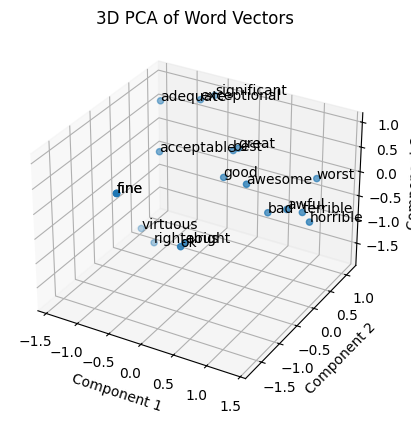

In [13]:


# Extraction des vecteurs de mots
words = [
    'good',
    'fine',
    'acceptable',
    'adequate',
    'virtuous',
    'righteous',
    'alright',
    'great',
    'awesome',
    'exceptional',
    'significant',
    'best',
    'ok',
    'fine',
    'bad',
    'awful',
    'worst',
    'terrible',
    'horrible',
]
# words = ["men", "women","cat"]
vectors = np.array([model[word] for word in words])

# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=3)
vectors_pca = pca.fit_transform(vectors)

# # Réduction de dimension à l'aide de t-SNE (si vous préférez t-SNE)
# tsne = TSNE(n_components=3, random_state=0)
# vectors_tsne = tsne.fit_transform(vectors)

# Visualisation en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(vectors_pca[:, 0], vectors_pca[:, 1], vectors_pca[:, 2])

for i, word in enumerate(words):
    ax.text(vectors_pca[i, 0], vectors_pca[i, 1], vectors_pca[i, 2], word)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.title('3D PCA of Word Vectors')
plt.show()

# Representation en 3D

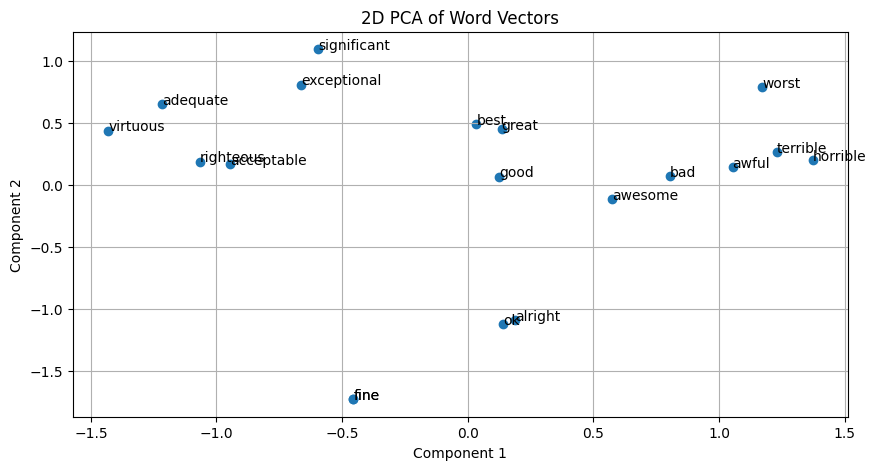

In [24]:
# Extraction des vecteurs de mots
words = [
    'good',
    'fine',
    'acceptable',
    'adequate',
    'virtuous',
    'righteous',
    'alright',
    'great',
    'awesome',
    'exceptional',
    'significant',
    'best',
    'ok',
    'fine',
    'bad',
    'awful',
    'worst',
    'terrible',
    'horrible',
]

vectors = np.array([model[word] for word in words])



# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors)

# Visualisation en 2D
plt.figure(figsize=(10, 5))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()

## J'essaie de réaliser une acp sur tout le vocabulaire afin d'obtenir des vecteurs de dimensions 100, cependant, étant donné que le vocabulaire est trop grand, je me restreins au 1000 premiers mots. Je rajoute à ces 1000 mots ceux que l'ont a tester dans la cellule précèdente pour ensuite essayer de realiser le meme test pour voir si l'on perd plus d'informations ou non.

In [18]:
terms = [
    'good',
    'fine',
    'acceptable',
    'adequate',
    'virtuous',
    'righteous',
    'alright',
    'great',
    'awesome',
    'exceptional',
    'significant',
    'best',
    'ok',
    'fine',
    'bad',
    'awful',
    'worst',
    'terrible',
    'horrible',
]

words = list(model.key_to_index.keys())[:1000]
# print(words)
words = list(set(words).union(set(terms)))
# print(words)
print(len(words))
print('horrible' in words) 
vectors = np.array([model[word] for word in words])

print("test1")
print(vectors)
print(len(vectors))
print("dimension before acp : ", len(vectors[0]))

# Appliquer PCA pour réduire les dimensions à 2
pca = PCA(n_components=100)
vectors_pca = pca.fit_transform(vectors)
print("dimension after pca : ", len(vectors_pca[0]))
print("end")

1013
True
test1
[[ 0.15820312  0.15332031 -0.09326172 ...  0.18652344  0.10009766
  -0.07421875]
 [ 0.23242188  0.02099609  0.02868652 ...  0.0144043   0.11035156
  -0.03564453]
 [-0.01184082 -0.19433594  0.26367188 ... -0.15332031 -0.10302734
  -0.29492188]
 ...
 [-0.14257812 -0.03686523  0.13574219 ... -0.01446533 -0.12695312
  -0.25976562]
 [-0.0559082   0.11767578  0.2109375  ... -0.04272461  0.14746094
  -0.18261719]
 [ 0.17578125  0.02453613 -0.16894531 ... -0.3984375   0.01550293
   0.04980469]]
1013
dimension before acp :  300
dimension after pca :  100
end


# Deuxieme méthode avec dictionnaire 

In [28]:
terms = [
    'good',
    'fine',
    'acceptable',
    'adequate',
    'virtuous',
    'righteous',
    'alright',
    'great',
    'awesome',
    'exceptional',
    'significant',
    'best',
    'ok',
    'fine',
    'bad',
    'awful',
    'worst',
    'terrible',
    'horrible',
]

# Limiter aux 1000 premiers mots du vocabulaire
words = list(model.key_to_index.keys())[:1000]
words = list(set(words).union(set(terms)))

# Extraire les vecteurs de mots
vectors = np.array([model[word] for word in words])

# Dictionnaire des vecteurs avant PCA
vectors_before_pca = {word: vectors[i] for i, word in enumerate(words)}

# Appliquer PCA pour réduire les dimensions à 100
pca = PCA(n_components=100)
vectors_pca = pca.fit_transform(vectors)

# Dictionnaire des vecteurs après PCA
vectors_after_pca = {word: vectors_pca[i] for i, word in enumerate(words)}

# Afficher des informations pour vérification
print("Nombre de mots:", len(words))
print("model['horrible']==vectors_before_pca['horrible'] :",np.array_equal(model['horrible'],vectors_before_pca['horrible']))
# print("vecteurs d'horrible :" , model["horrible"])
# print("Vecteurs avant PCA pour 'horrible':", vectors_before_pca['horrible'])
print("Dimension avant PCA:", len(vectors[0]))
print("Vecteurs après PCA pour 'horrible':", vectors_after_pca['horrible'])
print("Dimension après PCA:", len(vectors_pca[0]))

# Vérification des tailles des dictionnaires
print("Taille du dictionnaire avant PCA:", len(vectors_before_pca))
print("Taille du dictionnaire après PCA:", len(vectors_after_pca))
print("Fin")

Nombre de mots: 1013
model['horrible']==vectors_before_pca['horrible'] : True
Dimension avant PCA: 300
Vecteurs après PCA pour 'horrible': [-0.8452793   0.21792586  0.08211793  0.22577284  0.19000071  0.26453605
 -0.05432248  0.03888626  0.35431522  0.42746848  0.3223598  -0.49875006
 -0.08762834 -0.2974924   0.21853915  0.26977068 -0.3696956   0.30064917
  0.07933837 -0.6410607   0.12737608  0.04482132 -0.11972883 -0.16100627
 -0.1227999   0.01275191 -0.22845007 -0.2202388  -0.1920478   0.09434809
 -0.09858128  0.5843519   0.30528507 -0.31206942 -0.13375728  0.06028069
 -0.18704809  0.12005454 -0.11682889  0.05113798 -0.34764054  0.32327858
  0.04415344 -0.00134759 -0.15796092  0.1328029   0.40233222 -0.18709792
 -0.07174969  0.30289808 -0.20976032  0.17796955 -0.21464051  0.00789525
 -0.20763703  0.18394409  0.18195918 -0.20099844  0.12177083 -0.06494748
 -0.1631726   0.07169148 -0.00741909  0.01607844 -0.2790407  -0.10247485
 -0.05643652  0.11446335  0.04043101 -0.33875033  0.174627

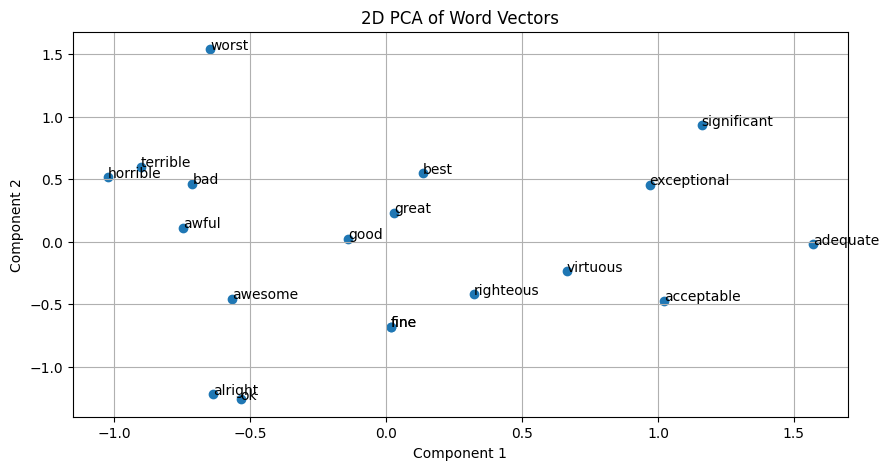

In [31]:
# Extraction des vecteurs de mots
words = [
    'good',
    'fine',
    'acceptable',
    'adequate',
    'virtuous',
    'righteous',
    'alright',
    'great',
    'awesome',
    'exceptional',
    'significant',
    'best',
    'ok',
    'fine',
    'bad',
    'awful',
    'worst',
    'terrible',
    'horrible',
]

new_vectors = np.array([vectors_after_pca[word] for word in words])

# Réduction de dimension à l'aide de PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(new_vectors)

# Visualisation en 2D
plt.figure(figsize=(10, 5))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D PCA of Word Vectors')
plt.grid(True)
plt.show()